In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy
from pathlib import Path

import matplotlib.pyplot as plt
from sklearn.cluster import k_means, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

In [2]:
import sys

sys.path.append("../src")

In [3]:
from core import SITE_NAMES
from calls import plot_call_features, compute_features


random_state_for_sites = {'Foliage':800, 'Carp':200, 'Central':0, 'Telephone':0}
color_for_groups = {0: 'blue', 1: 'red', 2:'limegreen'}
label_for_groups = {0: 'LF1', 1: 'HF1', 2:'HF2'}

In [4]:
site_key = 'Carp'
input_dir = Path(f'../data/detected_calls/{site_key}')
output_dir = Path(f'../data/generated_welch/{site_key}')
if not(output_dir.is_dir()):
    output_dir.mkdir(parents=True)
input_file_type = 'top1_inbouts_call_signals'
output_file_type = 'top1_inbouts_welch_signals'

location_call_signals = np.load(input_dir / f'2022_{site_key}_{input_file_type}.npy', allow_pickle=True)
location_calls_sampled = pd.read_csv(input_dir / f'2022_{site_key}_{input_file_type}.csv', index_col=0, low_memory=False)
location_calls_sampled['index'] = location_calls_sampled.index

welch_signals = compute_features.generate_welchs_for_calls(location_calls_sampled, location_call_signals)
welch_data = pd.DataFrame(welch_signals, columns=np.linspace(0, 96000, welch_signals.shape[1]).astype(int))
welch_data.index.name = 'Call #'
welch_data.columns.name = 'Frequency (kHz)'
welch_data.to_csv(output_dir / f'2022_{site_key}_{output_file_type}.csv')

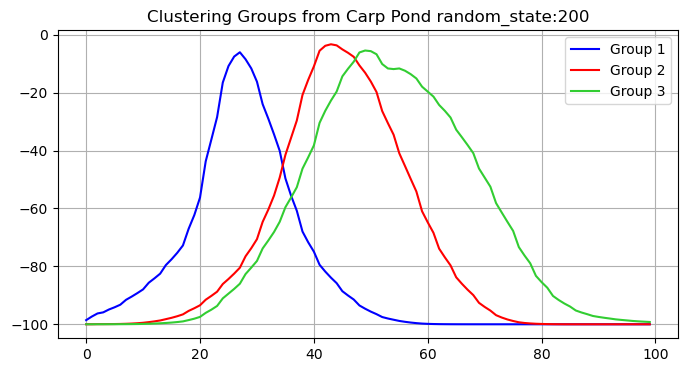

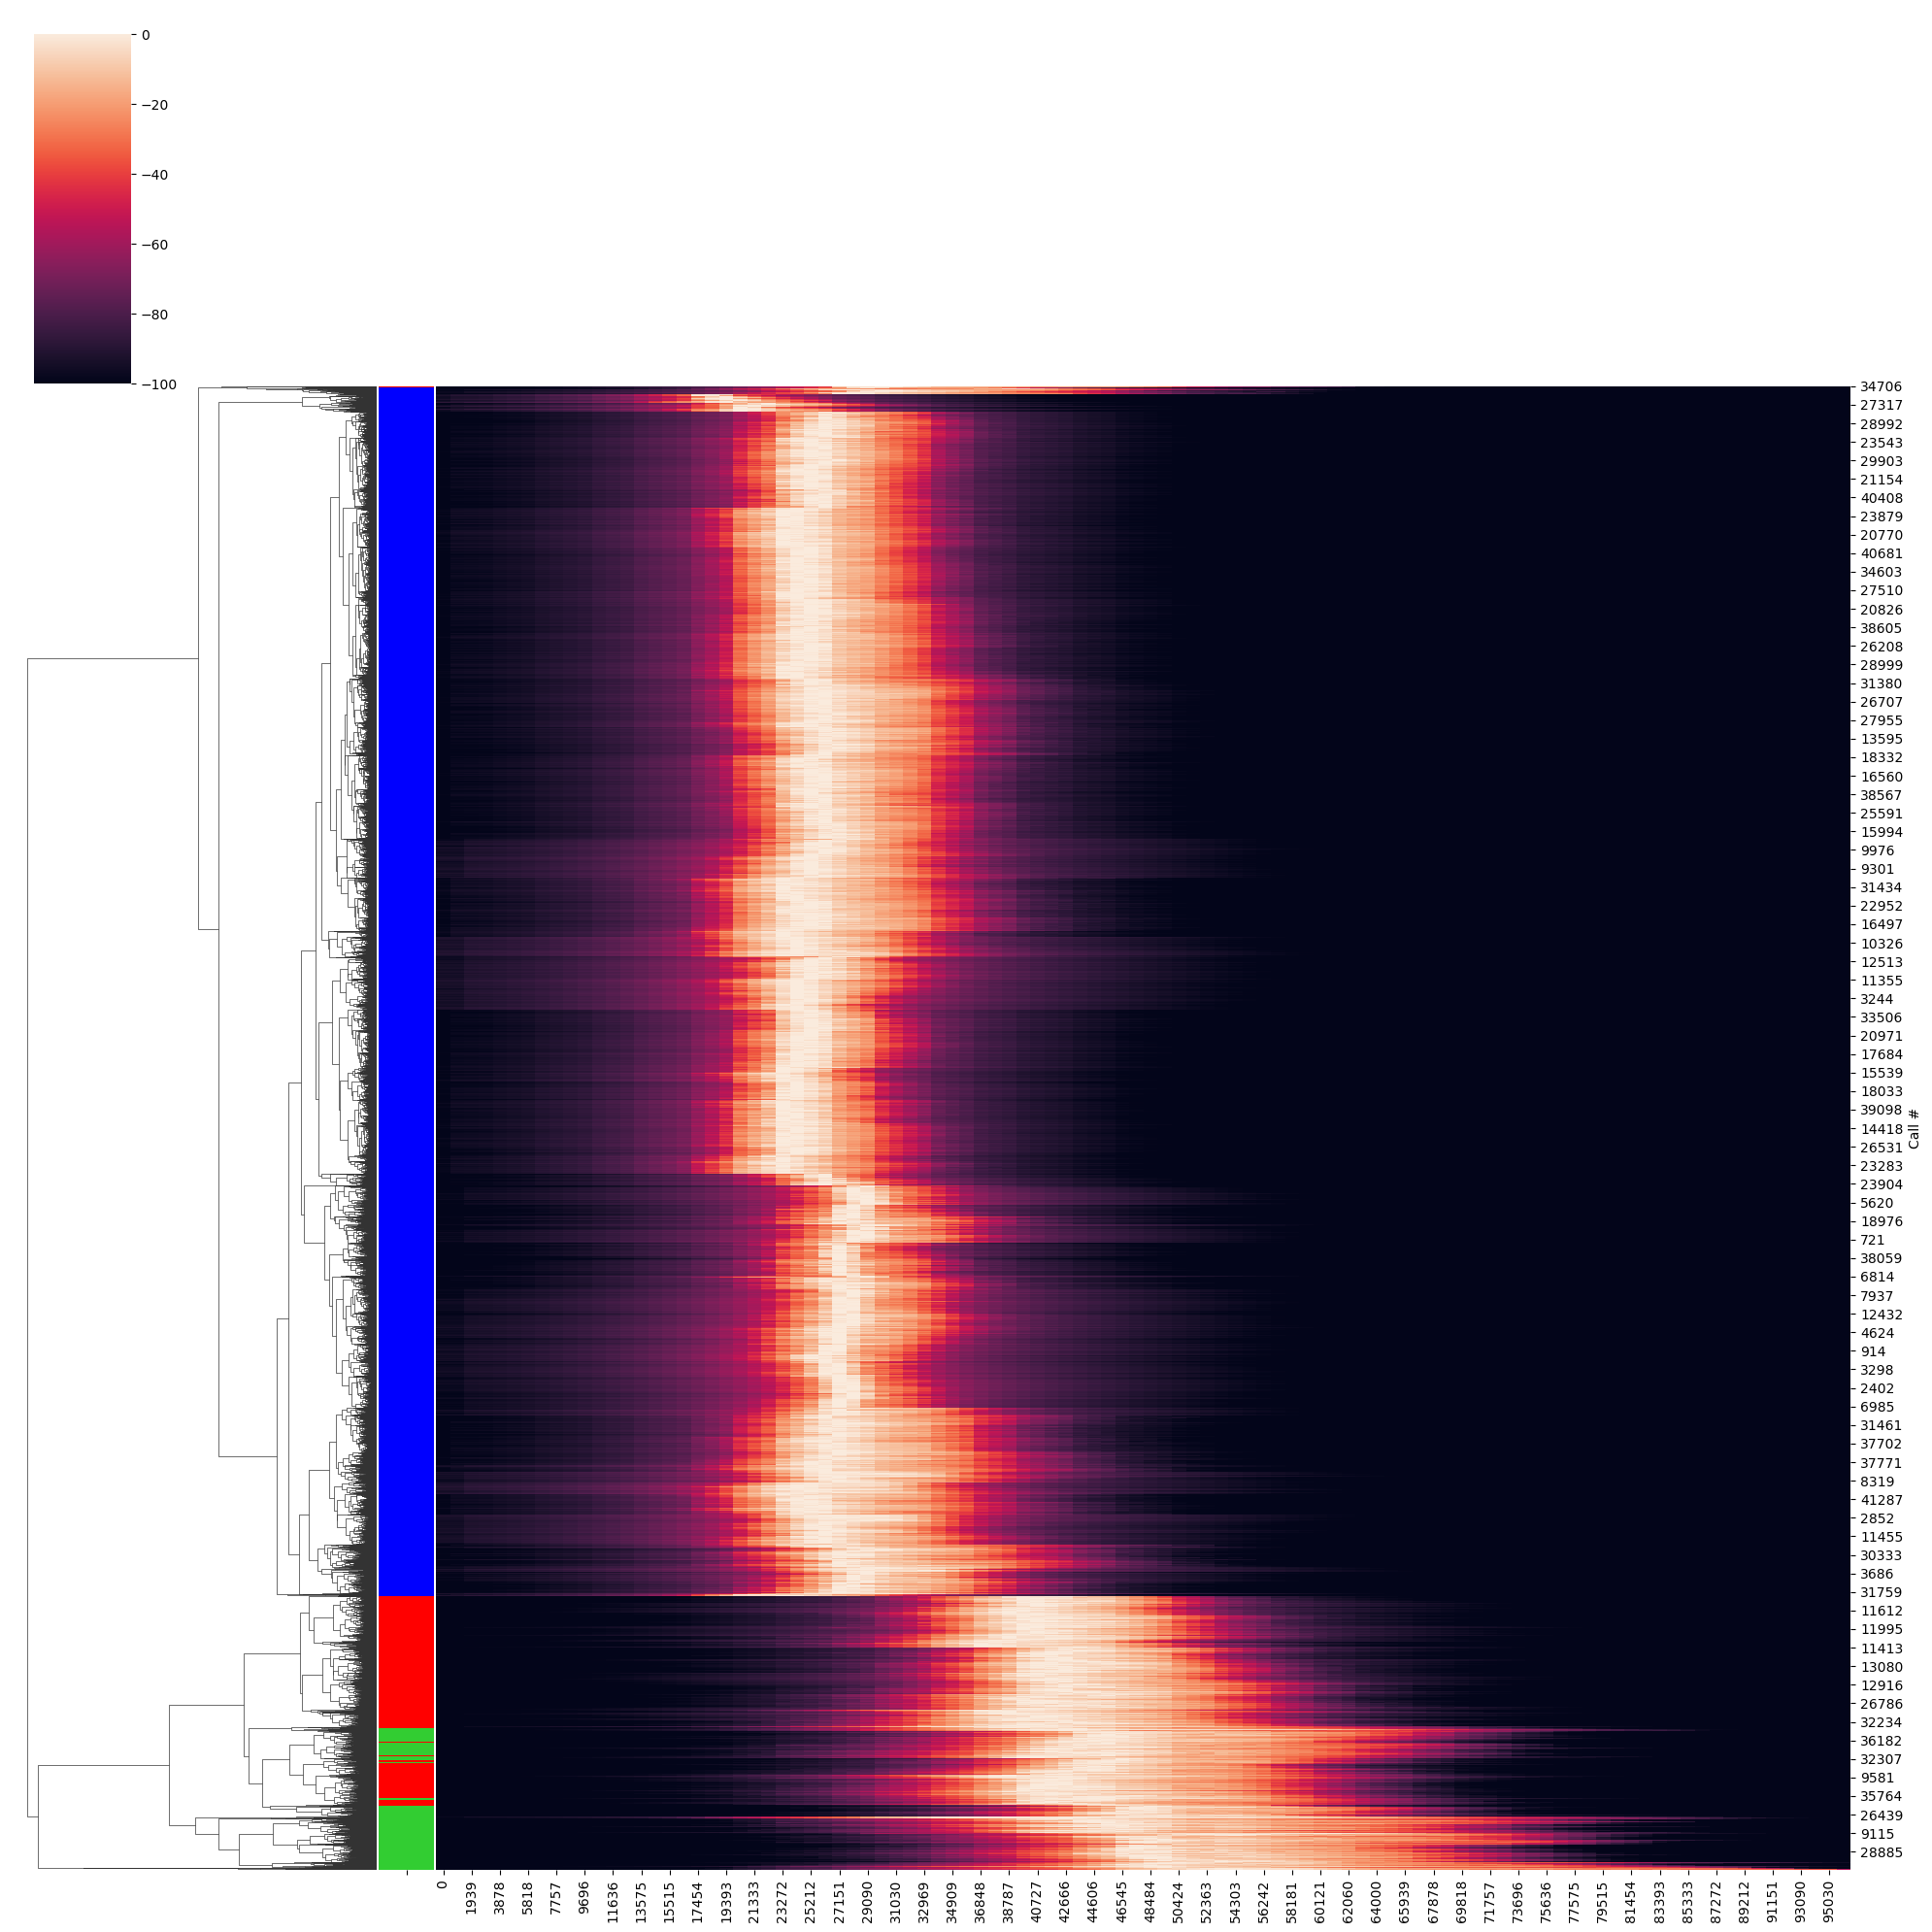

In [5]:
welch_data = pd.read_csv(output_dir / f'2022_{site_key}_{output_file_type}.csv', index_col=0, low_memory=False)

k = 3
kmean_welch = KMeans(n_clusters=k, n_init=10, random_state=random_state_for_sites[site_key]).fit(welch_data)
plt.figure(figsize=(8, 4))
plt.title(f'Clustering Groups from {SITE_NAMES[site_key]} random_state:{random_state_for_sites[site_key]}')
for i in range(k):
    plt.plot(kmean_welch.cluster_centers_[i], label=f'Group {i+1}', color=color_for_groups[i])
plt.grid(which='both')
plt.legend()
plt.show()

groups = pd.Series(kmean_welch.labels_)
groups_to_labels = groups.map(label_for_groups)
groups_to_colors = groups.map(color_for_groups)
sns.clustermap(welch_data, figsize=(20, 20), col_cluster=False, row_colors=groups_to_colors)

In [6]:
site_key = 'Central'
input_dir = Path(f'../data/detected_calls/{site_key}')
output_dir = Path(f'../data/generated_welch/{site_key}')
if not(output_dir.is_dir()):
    output_dir.mkdir(parents=True)
input_file_type = 'top1_inbouts_call_signals'
output_file_type = 'top1_inbouts_welch_signals'

location_call_signals = np.load(input_dir / f'2022_{site_key}_{input_file_type}.npy', allow_pickle=True)
location_calls_sampled = pd.read_csv(input_dir / f'2022_{site_key}_{input_file_type}.csv', index_col=0, low_memory=False)
location_calls_sampled['index'] = location_calls_sampled.index

welch_signals = compute_features.generate_welchs_for_calls(location_calls_sampled, location_call_signals)
welch_data = pd.DataFrame(welch_signals, columns=np.linspace(0, 96000, welch_signals.shape[1]).astype(int))
welch_data.index.name = 'Call #'
welch_data.columns.name = 'Frequency (kHz)'
welch_data.to_csv(output_dir / f'2022_{site_key}_{output_file_type}.csv')

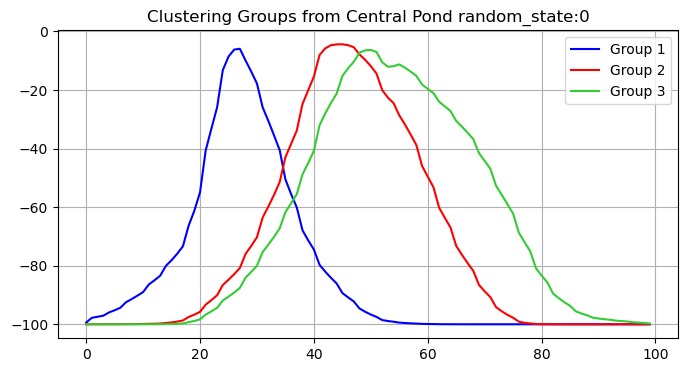

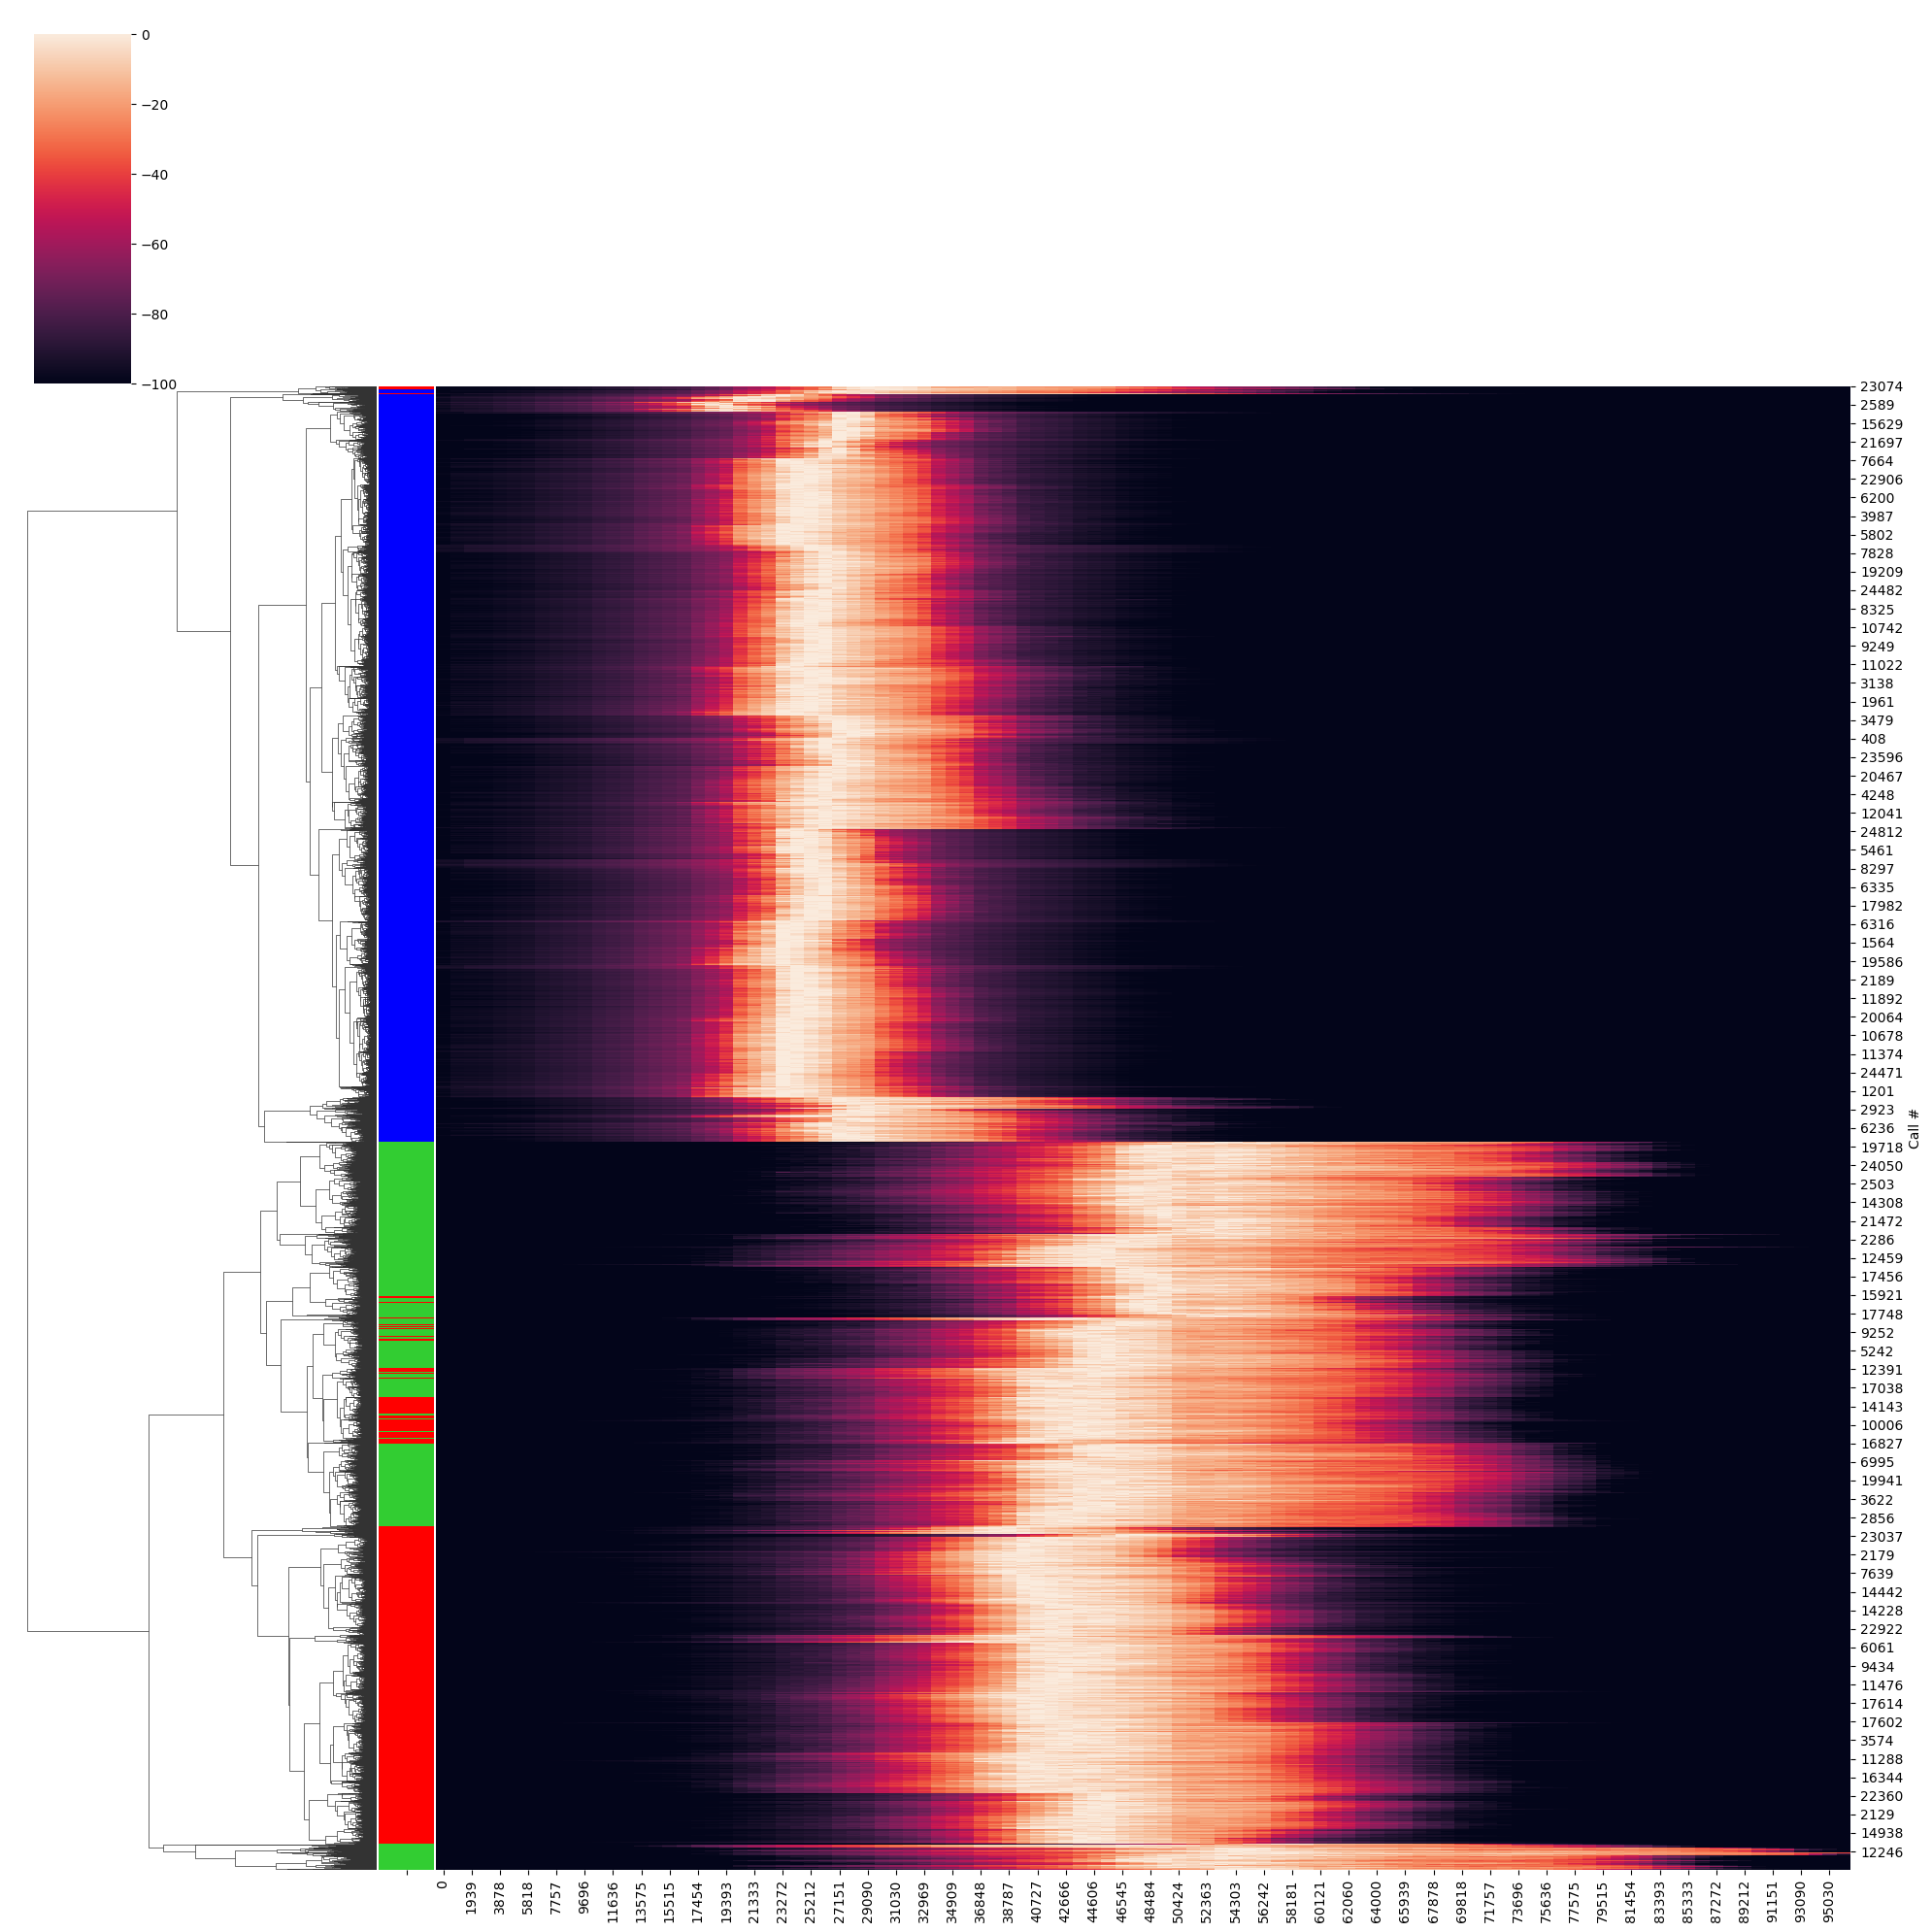

In [7]:
welch_data = pd.read_csv(output_dir / f'2022_{site_key}_{output_file_type}.csv', index_col=0, low_memory=False)

k = 3
kmean_welch = KMeans(n_clusters=k, n_init=10, random_state=random_state_for_sites[site_key]).fit(welch_data)
plt.figure(figsize=(8, 4))
plt.title(f'Clustering Groups from {SITE_NAMES[site_key]} random_state:{random_state_for_sites[site_key]}')
for i in range(k):
    plt.plot(kmean_welch.cluster_centers_[i], label=f'Group {i+1}', color=color_for_groups[i])
plt.grid(which='both')
plt.legend()
plt.show()

groups = pd.Series(kmean_welch.labels_)
groups_to_labels = groups.map(label_for_groups)
groups_to_colors = groups.map(color_for_groups)
sns.clustermap(welch_data, figsize=(20, 20), col_cluster=False, row_colors=groups_to_colors)

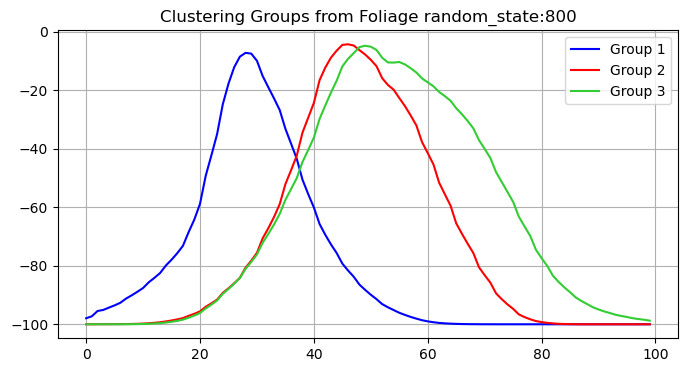

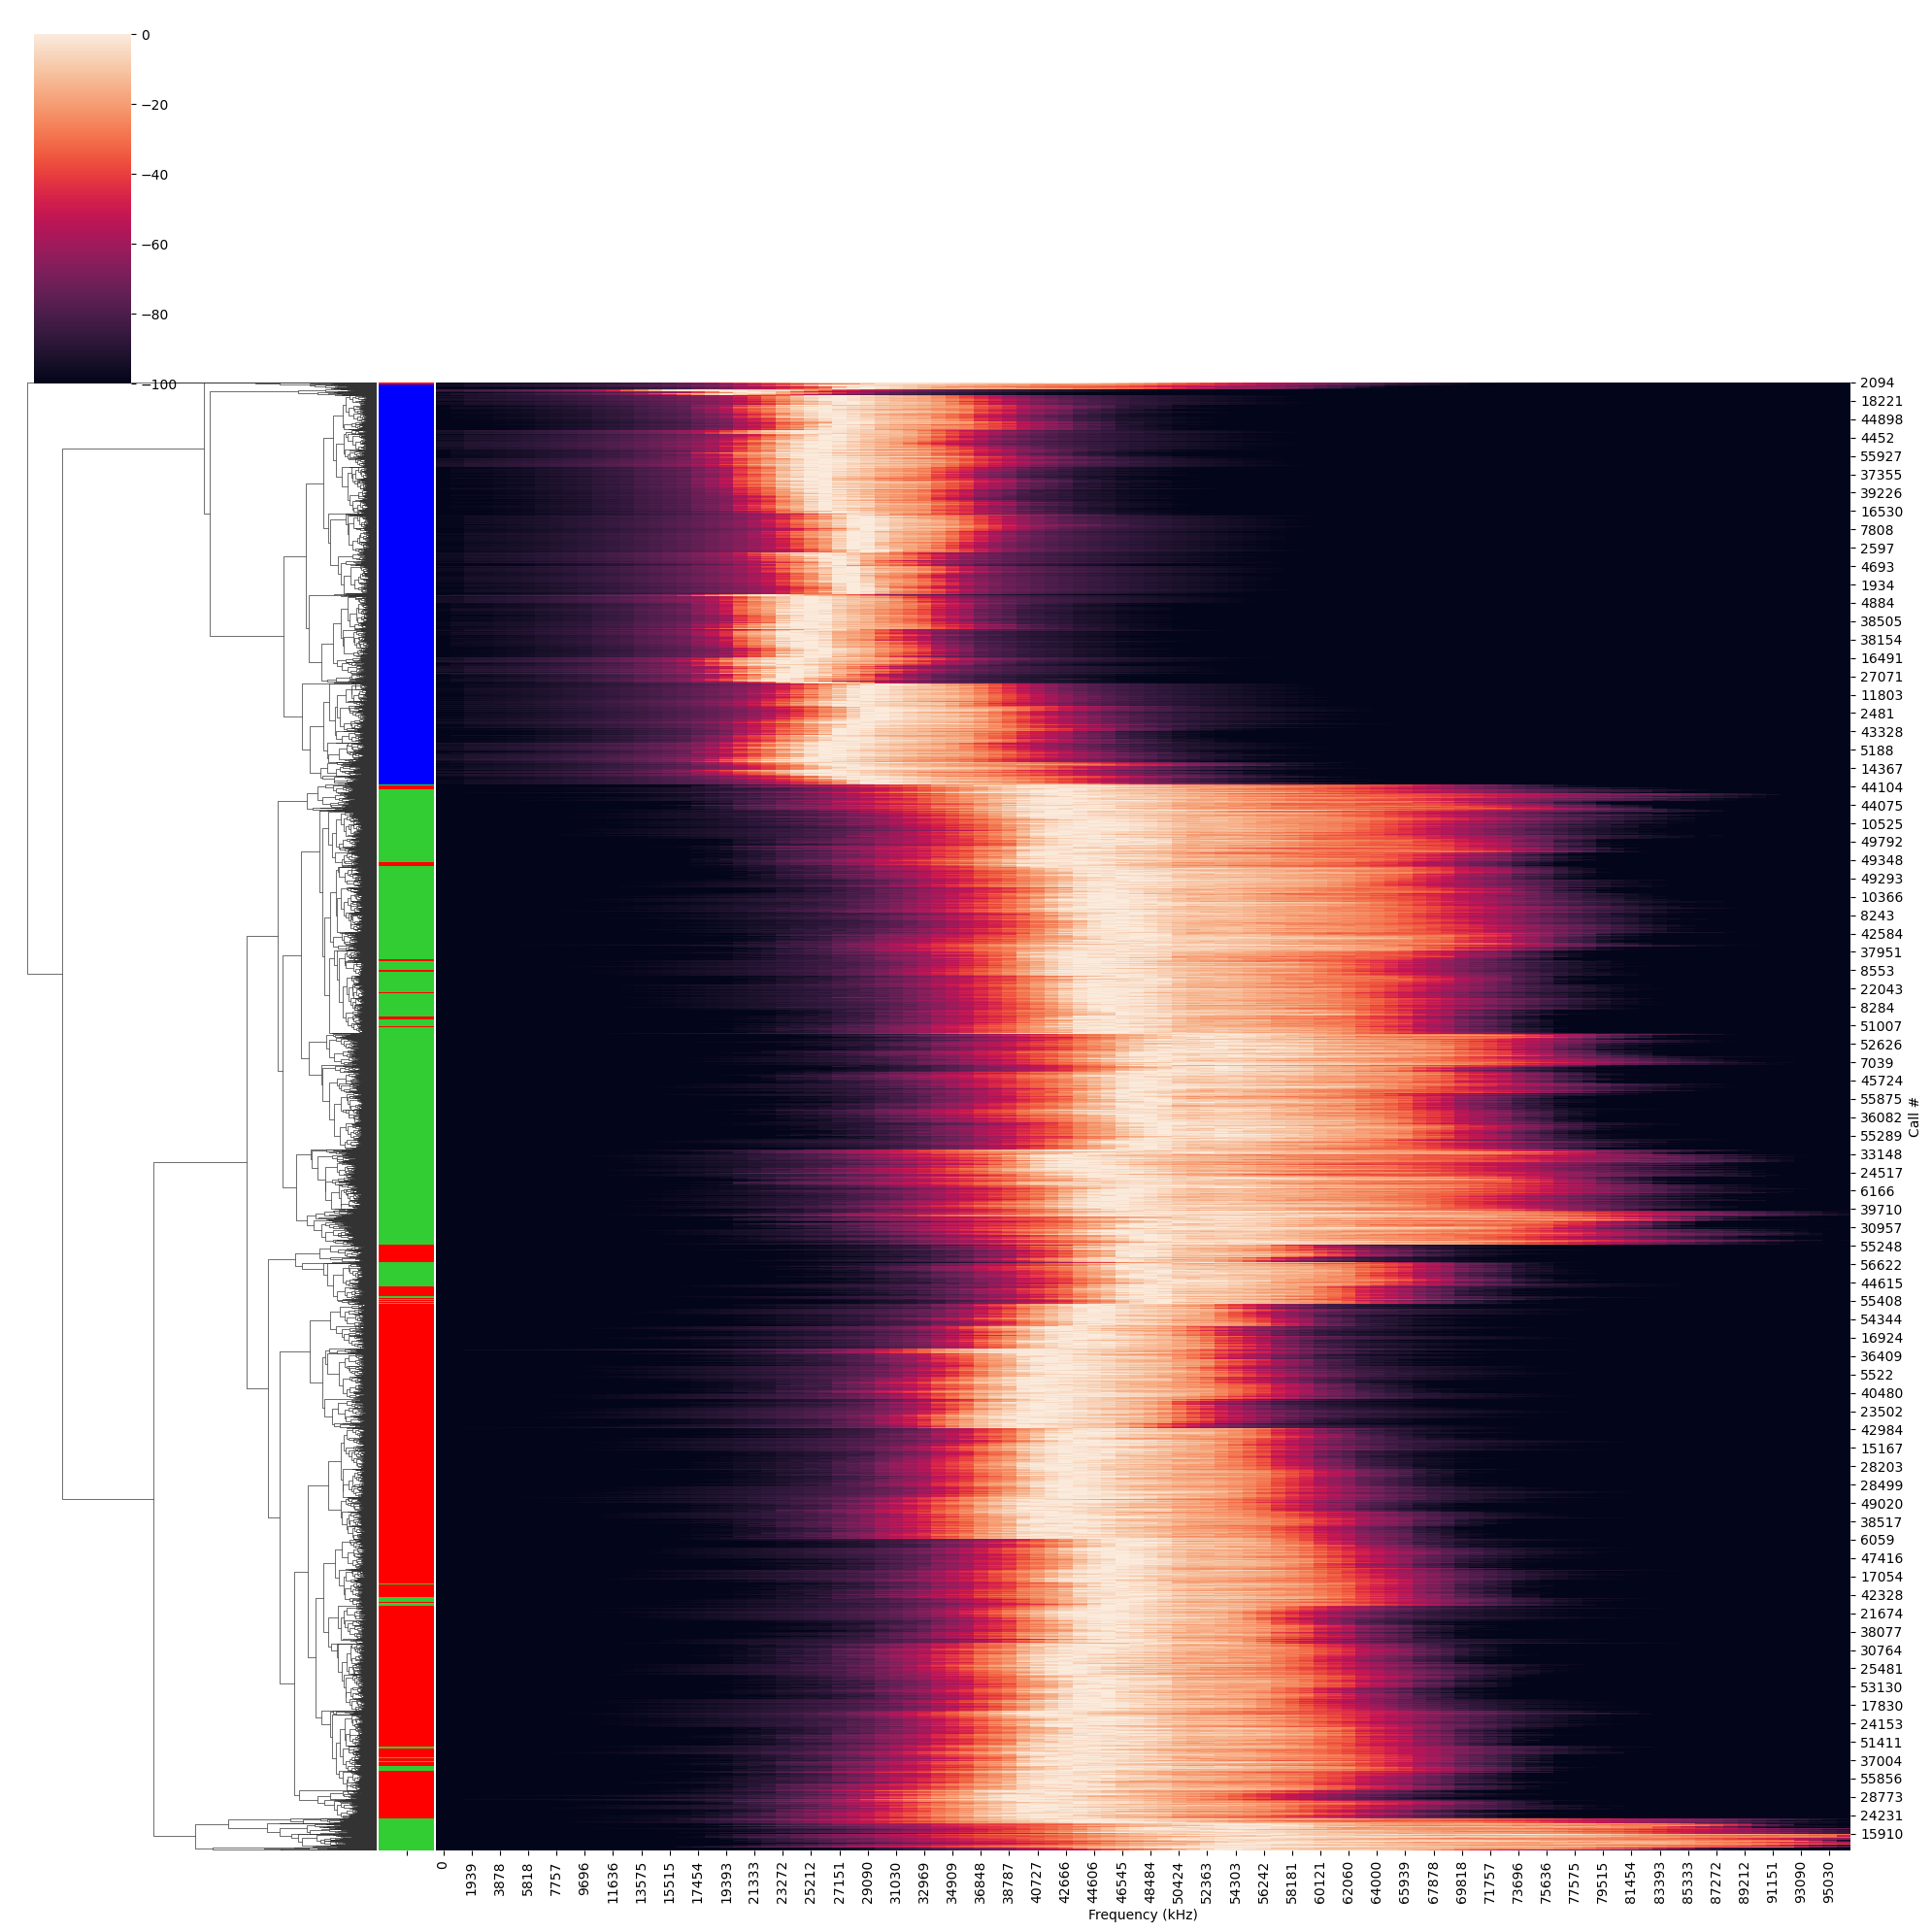

In [8]:
site_key = 'Foliage'
location_call_signals = np.load(f'../data/detected_calls/{site_key}/2022_{site_key}_top1_inbouts_call_signals.npy', allow_pickle=True)
location_calls_sampled = pd.read_csv(f'../data/detected_calls/{site_key}/2022_{site_key}_top1_inbouts_call_signals.csv', index_col=0, low_memory=False)
location_calls_sampled['index'] = location_calls_sampled.index

welch_signals = compute_features.generate_welchs_for_calls(location_calls_sampled, location_call_signals)

welch_data = pd.DataFrame(welch_signals, columns=np.linspace(0, 96000, welch_signals.shape[1]).astype(int))
welch_data.index.name = 'Call #'
welch_data.columns.name = 'Frequency (kHz)'

k = 3
kmean_welch = KMeans(n_clusters=k, n_init=10, random_state=random_state_for_sites[site_key]).fit(welch_data)
plt.figure(figsize=(8, 4))
plt.title(f'Clustering Groups from {SITE_NAMES[site_key]} random_state:{random_state_for_sites[site_key]}')
for i in range(k):
    plt.plot(kmean_welch.cluster_centers_[i], label=f'Group {i+1}', color=color_for_groups[i])
plt.grid(which='both')
plt.legend()
plt.show()

groups = pd.Series(kmean_welch.labels_)
groups_to_labels = groups.map(label_for_groups)
groups_to_colors = groups.map(color_for_groups)
sns.clustermap(welch_data, figsize=(20, 20), col_cluster=False, row_colors=groups_to_colors)

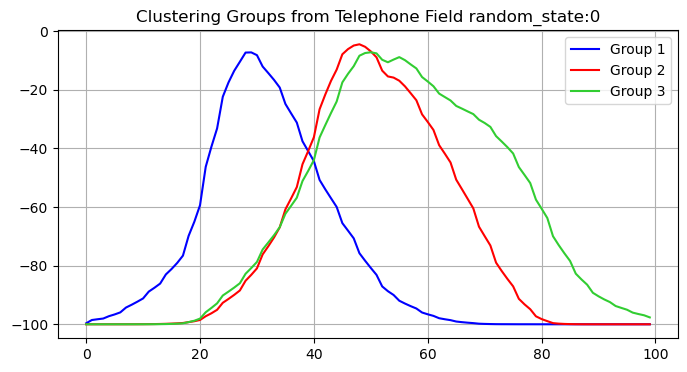

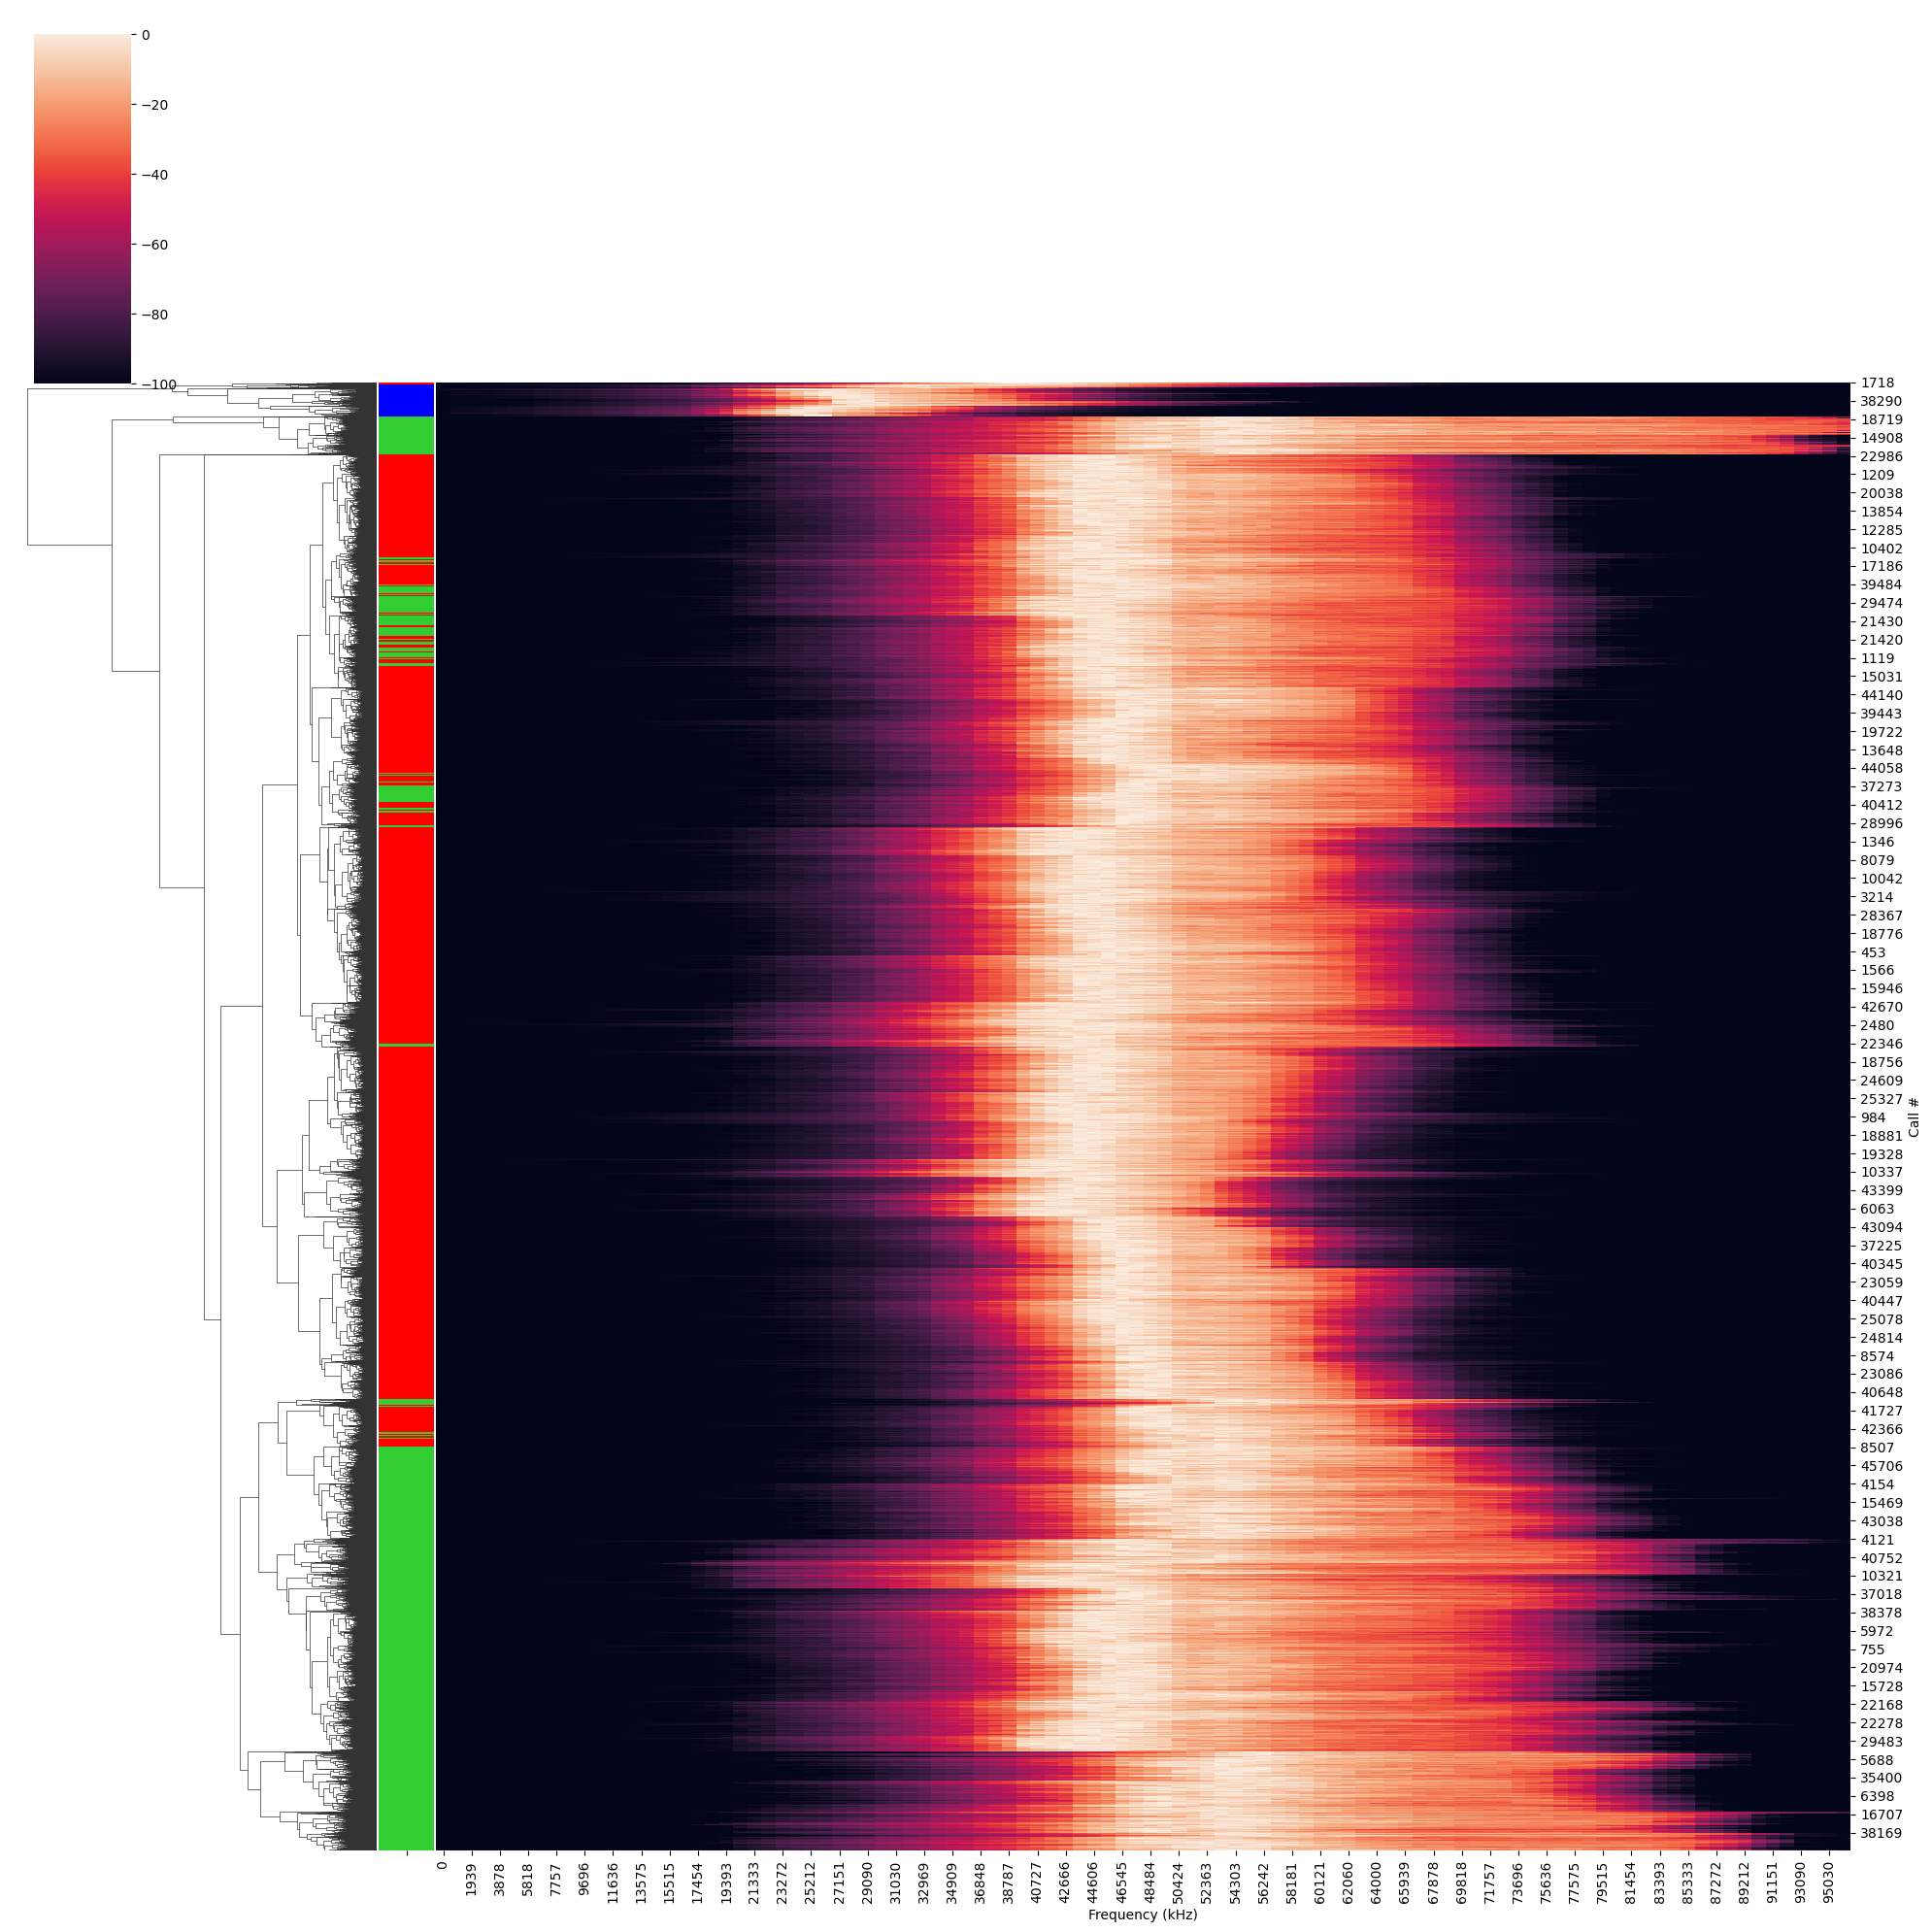

In [9]:
site_key = 'Telephone'
location_call_signals = np.load(f'../data/detected_calls/{site_key}/2022_{site_key}_top1_inbouts_call_signals.npy', allow_pickle=True)
location_calls_sampled = pd.read_csv(f'../data/detected_calls/{site_key}/2022_{site_key}_top1_inbouts_call_signals.csv', index_col=0, low_memory=False)
location_calls_sampled['index'] = location_calls_sampled.index

welch_signals = compute_features.generate_welchs_for_calls(location_calls_sampled, location_call_signals)

welch_data = pd.DataFrame(welch_signals, columns=np.linspace(0, 96000, welch_signals.shape[1]).astype(int))
welch_data.index.name = 'Call #'
welch_data.columns.name = 'Frequency (kHz)'

k = 3
kmean_welch = KMeans(n_clusters=k, n_init=10, random_state=random_state_for_sites[site_key]).fit(welch_data)
plt.figure(figsize=(8, 4))
plt.title(f'Clustering Groups from {SITE_NAMES[site_key]} random_state:{random_state_for_sites[site_key]}')
for i in range(k):
    plt.plot(kmean_welch.cluster_centers_[i], label=f'Group {i+1}', color=color_for_groups[i])
plt.grid(which='both')
plt.legend()
plt.show()

groups = pd.Series(kmean_welch.labels_)
groups_to_labels = groups.map(label_for_groups)
groups_to_colors = groups.map(color_for_groups)
sns.clustermap(welch_data, figsize=(20, 20), col_cluster=False, row_colors=groups_to_colors)


Central
Foliage
Carp
Telephone


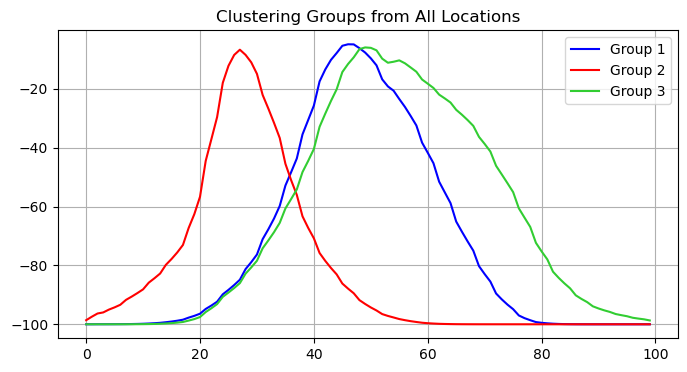

In [10]:
all_sites_welch_signals = []
for site_key in SITE_NAMES.keys():
    if Path(f'../data/detected_calls/{site_key}/2022_{site_key}_top1_inbouts_call_signals.npy').exists():
        print(site_key)
        location_call_signals = np.load(f'../data/detected_calls/{site_key}/2022_{site_key}_top1_inbouts_call_signals.npy', allow_pickle=True)
        location_calls_sampled = pd.read_csv(f'../data/detected_calls/{site_key}/2022_{site_key}_top1_inbouts_call_signals.csv', index_col=0, low_memory=False)
        location_calls_sampled['index'] = location_calls_sampled.index

        welch_signals = compute_features.generate_welchs_for_calls(location_calls_sampled, location_call_signals)
        all_sites_welch_signals.append(welch_signals)

all_sites_welch_signals = np.vstack(all_sites_welch_signals)
welch_data = pd.DataFrame(all_sites_welch_signals, columns=np.linspace(0, 96000, all_sites_welch_signals.shape[1]).astype(int))
welch_data.index.name = 'Call #'
welch_data.columns.name = 'Frequency (kHz)'
welch_data.to_csv('../data/generated_welch/all_locations/2022_all_locations_top1_inbouts_welch_signals.npy')

k = 3
kmean_welch = KMeans(n_clusters=k, n_init=10, random_state=100).fit(welch_data)
plt.figure(figsize=(8, 4))
plt.title(f'Clustering Groups from All Locations')
for i in range(k):
    plt.plot(kmean_welch.cluster_centers_[i], label=f'Group {i+1}', color=color_for_groups[i])
plt.grid(which='both')
plt.legend()
plt.show()

# groups = pd.Series(kmean_welch.labels_)
# groups_to_labels = groups.map(label_for_groups)
# groups_to_colors = groups.map(color_for_groups)
# sns.clustermap(welch_data, figsize=(20, 10), row_colors=groups_to_colors)

Central
Carp


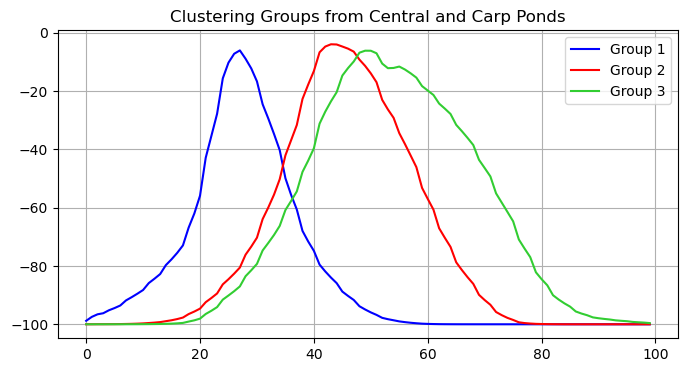

In [11]:
ponds_welch_signals = []
for site_key in SITE_NAMES.keys():
    if Path(f'../data/detected_calls/{site_key}/2022_{site_key}_top1_inbouts_call_signals.npy').exists() and 'Pond' in SITE_NAMES[site_key]:
        print(site_key)
        location_call_signals = np.load(f'../data/detected_calls/{site_key}/2022_{site_key}_top1_inbouts_call_signals.npy', allow_pickle=True)
        location_calls_sampled = pd.read_csv(f'../data/detected_calls/{site_key}/2022_{site_key}_top1_inbouts_call_signals.csv', index_col=0, low_memory=False)
        location_calls_sampled['index'] = location_calls_sampled.index

        welch_signals = compute_features.generate_welchs_for_calls(location_calls_sampled, location_call_signals)
        ponds_welch_signals.append(welch_signals)

ponds_welch_signals = np.vstack(ponds_welch_signals)
welch_data = pd.DataFrame(ponds_welch_signals, columns=np.linspace(0, 96000, ponds_welch_signals.shape[1]).astype(int))
welch_data.index.name = 'Call #'
welch_data.columns.name = 'Frequency (kHz)'

k = 3
kmean_welch = KMeans(n_clusters=k, n_init=10, random_state=40).fit(welch_data)
plt.figure(figsize=(8, 4))
plt.title(f'Clustering Groups from Central and Carp Ponds')
for i in range(k):
    plt.plot(kmean_welch.cluster_centers_[i], label=f'Group {i+1}', color=color_for_groups[i])
plt.grid(which='both')
plt.legend()
plt.show()

# groups = pd.Series(kmean_welch.labels_)
# groups_to_labels = groups.map(label_for_groups)
# groups_to_colors = groups.map(color_for_groups)
# sns.clustermap(welch_data, figsize=(20, 10), row_colors=groups_to_colors)

Foliage
Telephone


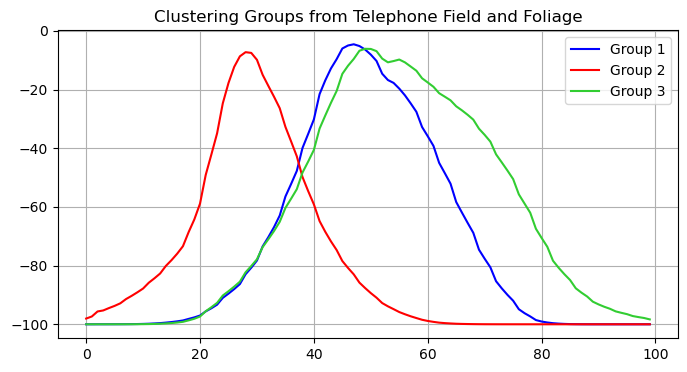

In [12]:
clutter_welch_signals = []
for site_key in SITE_NAMES.keys():
    if Path(f'../data/detected_calls/{site_key}/2022_{site_key}_top1_inbouts_call_signals.npy').exists() and not('Pond' in SITE_NAMES[site_key]):
        print(site_key)
        location_call_signals = np.load(f'../data/detected_calls/{site_key}/2022_{site_key}_top1_inbouts_call_signals.npy', allow_pickle=True)
        location_calls_sampled = pd.read_csv(f'../data/detected_calls/{site_key}/2022_{site_key}_top1_inbouts_call_signals.csv', index_col=0, low_memory=False)
        location_calls_sampled['index'] = location_calls_sampled.index

        welch_signals = compute_features.generate_welchs_for_calls(location_calls_sampled, location_call_signals)
        clutter_welch_signals.append(welch_signals)

clutter_welch_signals = np.vstack(clutter_welch_signals)
welch_data = pd.DataFrame(clutter_welch_signals, columns=np.linspace(0, 96000, clutter_welch_signals.shape[1]).astype(int))
welch_data.index.name = 'Call #'
welch_data.columns.name = 'Frequency (kHz)'

k = 3
kmean_welch = KMeans(n_clusters=k, n_init=10, random_state=80).fit(welch_data)
plt.figure(figsize=(8, 4))
plt.title(f'Clustering Groups from Telephone Field and Foliage')
for i in range(k):
    plt.plot(kmean_welch.cluster_centers_[i], label=f'Group {i+1}', color=color_for_groups[i])
plt.grid(which='both')
plt.legend()
plt.show()

# groups = pd.Series(kmean_welch.labels_)
# groups_to_labels = groups.map(label_for_groups)
# groups_to_colors = groups.map(color_for_groups)
# sns.clustermap(welch_data, figsize=(20, 10), row_colors=groups_to_colors)